# Import data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-history-of-baseball/player_award.csv
/kaggle/input/the-history-of-baseball/hall_of_fame.csv
/kaggle/input/the-history-of-baseball/team.csv
/kaggle/input/the-history-of-baseball/fielding_outfield.csv
/kaggle/input/the-history-of-baseball/hashes.txt
/kaggle/input/the-history-of-baseball/batting.csv
/kaggle/input/the-history-of-baseball/team_franchise.csv
/kaggle/input/the-history-of-baseball/batting_postseason.csv
/kaggle/input/the-history-of-baseball/manager_award.csv
/kaggle/input/the-history-of-baseball/pitching.csv
/kaggle/input/the-history-of-baseball/player.csv
/kaggle/input/the-history-of-baseball/player_college.csv
/kaggle/input/the-history-of-baseball/team_half.csv
/kaggle/input/the-history-of-baseball/park.csv
/kaggle/input/the-history-of-baseball/college.csv
/kaggle/input/the-history-of-baseball/player_award_vote.csv
/kaggle/input/the-history-of-baseball/salary.csv
/kaggle/input/the-history-of-baseball/manager_half.csv
/kaggle/input/the-history-of-baseball/fi

In [2]:
salaries=pd.read_csv('/kaggle/input/baseball-databank/Salaries.csv')
salaries

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


Salaries for all MLB players from 1985 to 2015.

# Select data year

Lot of data to look at here- let's condense our dataset and use data from 2014 salaries to predict 2015 salaries.

In [3]:
recent=salaries[salaries['yearID'].isin(['2015'])]
recent

,yearID,teamID,lgID,playerID,salary
24758,2015,ARI,NL,ahmedni01,508500
24759,2015,ARI,NL,anderch01,512500
24760,2015,ARI,NL,chafian01,507500
24761,2015,ARI,NL,collmjo01,1400000
24762,2015,ARI,NL,corbipa01,524000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


In [4]:
recent.sort_values(by='salary',ascending=False)

,yearID,teamID,lgID,playerID,salary
25131,2015,LAN,NL,kershcl01,32571000
25031,2015,DET,AL,verlaju01,28000000
25318,2015,PHI,NL,howarry01,25000000
25124,2015,LAN,NL,greinza01,25000000
25391,2015,SEA,AL,hernafe02,24857000
...,...,...,...,...,...
25022,2015,DET,AL,mccanja02,507500
25177,2015,MIL,NL,gomezhe01,507500
25170,2015,MIL,NL,centeju01,507500
25222,2015,NYA,AL,betande01,507500


Top paid players look familiar, salaries are accurate.

Get player names by calling player ID.

In [5]:
#df of all player IDs mapping to player names
names=pd.read_csv('/kaggle/input/the-history-of-baseball/player.csv')
pd.set_option('display.max_columns', None)

#make column combining first and last name
names['name']=names['name_first']+' '+names['name_last']

#only need these two columns (rest of columns are unnecessary)
names=names[['player_id','name']]
names

,player_id,name
0,aardsda01,David Aardsma
1,aaronha01,Hank Aaron
2,aaronto01,Tommie Aaron
3,aasedo01,Don Aase
4,abadan01,Andy Abad
...,...,...
18841,zupofr01,Frank Zupo
18842,zuvelpa01,Paul Zuvella
18843,zuverge01,George Zuverink
18844,zwilldu01,Dutch Zwilling


# Import batting statistics.

In [6]:
batting=pd.read_csv('/kaggle/input/the-history-of-baseball/batting.csv')

#get batting data from 2014
hitting_2014=batting[batting['year'].isin(['2014'])]
hitting_2014

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
98411,abadfe01,2014,1,OAK,AL,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98412,abreubo01,2014,1,NYN,NL,78,133.0,12.0,33.0,9.0,0.0,1.0,14.0,1.0,0.0,20.0,21.0,0.0,0.0,0.0,2.0,3.0
98413,abreujo02,2014,1,CHA,AL,145,556.0,80.0,176.0,35.0,2.0,36.0,107.0,3.0,1.0,51.0,131.0,15.0,11.0,0.0,4.0,14.0
98414,abreuto01,2014,1,SFN,NL,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98415,aceveal01,2014,1,NYA,AL,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99841,zieglbr01,2014,1,ARI,NL,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99842,zimmejo02,2014,1,WAS,NL,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0
99843,zimmery01,2014,1,WAS,NL,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0
99844,zobribe01,2014,1,TBA,AL,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0


In [7]:
#all player IDs from 2014 salaries dataframe, need to convert to list for next step
players_2014=recent['playerID'].tolist()

#hitting data for players in 2014 salaries dataframe
hitting_2014_filtered=hitting_2014[hitting_2014['player_id'].isin(players_2014)]
hitting_2014_filtered

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
98411,abadfe01,2014,1,OAK,AL,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98413,abreujo02,2014,1,CHA,AL,145,556.0,80.0,176.0,35.0,2.0,36.0,107.0,3.0,1.0,51.0,131.0,15.0,11.0,0.0,4.0,14.0
98417,ackledu01,2014,1,SEA,AL,143,502.0,64.0,123.0,27.0,4.0,14.0,65.0,8.0,4.0,32.0,90.0,1.0,3.0,3.0,2.0,10.0
98419,adamsau01,2014,1,CLE,AL,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98421,adamsma01,2014,1,SLN,NL,142,527.0,55.0,152.0,34.0,5.0,15.0,68.0,3.0,2.0,26.0,114.0,5.0,3.0,0.0,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99841,zieglbr01,2014,1,ARI,NL,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99842,zimmejo02,2014,1,WAS,NL,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0
99843,zimmery01,2014,1,WAS,NL,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0
99844,zobribe01,2014,1,TBA,AL,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0


In [8]:
recent['playerID'].value_counts()

morelmi01    1
rogerja02    1
beltrad01    1
belivje01    1
smoakju01    1
            ..
guthrje01    1
hunteto01    1
forsylo01    1
peralwi01    1
grandya01    1
Name: playerID, Length: 817, dtype: int64

In [9]:
hitting_2014_filtered['player_id'].value_counts()

noesihe01    3
fuldsa01     3
johnske05    3
soriajo01    2
marisja01    2
            ..
ackledu01    1
millebr02    1
pederjo01    1
gonzama01    1
grandya01    1
Name: player_id, Length: 789, dtype: int64

We only had 802 players in our list of player salaries, but the batting data shows 877 entries. This is becase players that were traded during the season will have seperate batting stats for each team they play for. For these duplicates, let's add their batting data into one entry and see if that matches up. It is also possible there either of the datasets were missing salary or batting data for some players.

In [10]:
players=hitting_2014_filtered['player_id'].value_counts().index
adjusted_2014_hitting=pd.DataFrame()
for player in players:
    player_df=hitting_2014_filtered[hitting_2014_filtered['player_id'].isin([player])]
    if len(player_df)>1:
        numeric_stats=['g','ab','r','h','double','triple','hr','rbi','sb','cs','bb','so','ibb','hbp','sh','sf','g_idp']
        
        df=pd.DataFrame()
#         df=player_df.sum()[numeric_stats]
        df=df.append({'player_id':player,'year':'2014','stint':len(player_df),
                'team_id':'trade','league_id':'trade'},ignore_index=True)
        for stat in numeric_stats:
            df[stat]=player_df.sum()[stat]
        adjusted_2014_hitting=adjusted_2014_hitting.append(df)
    else:
        adjusted_2014_hitting=adjusted_2014_hitting.append(player_df)
adjusted_2014_hitting

,league_id,player_id,stint,team_id,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,trade,noesihe01,3.0,trade,2014,33,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,trade,fuldsa01,3.0,trade,2014,113,351.0,40.0,84.0,16.0,4.0,4.0,36.0,21.0,4.0,43.0,63.0,2.0,0.0,6.0,2.0,2.0
0,trade,johnske05,3.0,trade,2014,106,265.0,29.0,57.0,14.0,2.0,7.0,27.0,2.0,2.0,29.0,71.0,0.0,2.0,0.0,1.0,3.0
0,trade,soriajo01,2.0,trade,2014,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,trade,marisja01,2.0,trade,2014,65,221.0,21.0,55.0,8.0,0.0,3.0,19.0,11.0,3.0,8.0,67.0,3.0,3.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98417,AL,ackledu01,1.0,SEA,2014,143,502.0,64.0,123.0,27.0,4.0,14.0,65.0,8.0,4.0,32.0,90.0,1.0,3.0,3.0,2.0,10.0
99266,AL,millebr02,1.0,SEA,2014,123,367.0,47.0,81.0,15.0,4.0,10.0,36.0,4.0,2.0,34.0,95.0,2.0,2.0,3.0,3.0,2.0
99393,NL,pederjo01,1.0,LAN,2014,18,28.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0
98909,AL,gonzama01,1.0,HOU,2014,103,285.0,33.0,79.0,15.0,1.0,6.0,23.0,2.0,4.0,17.0,58.0,0.0,4.0,4.0,0.0,6.0


In [11]:
adjusted_2014_hitting=adjusted_2014_hitting.reset_index().drop(columns='index')

In [12]:
recent

,yearID,teamID,lgID,playerID,salary
24758,2015,ARI,NL,ahmedni01,508500
24759,2015,ARI,NL,anderch01,512500
24760,2015,ARI,NL,chafian01,507500
24761,2015,ARI,NL,collmjo01,1400000
24762,2015,ARI,NL,corbipa01,524000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


# Add salary data

Map player ID to salary and add to dataframe.

In [13]:
adjusted_2014_hitting['salary']=[recent[recent['playerID'].isin([player])].reset_index()
                        ['salary'][0] for player in adjusted_2014_hitting['player_id']]

In [14]:
adjusted_2014_hitting.sort_values(by='salary',ascending=False)

,league_id,player_id,stint,team_id,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
150,NL,kershcl01,1.0,LAN,2014,27,63.0,5.0,11.0,0.0,1.0,0.0,3.0,1.0,0.0,4.0,23.0,0.0,1.0,6.0,0.0,1.0,32571000
506,AL,verlaju01,1.0,DET,2014,32,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,28000000
196,NL,greinza01,1.0,LAN,2014,32,60.0,5.0,12.0,6.0,0.0,1.0,3.0,0.0,0.0,5.0,11.0,0.0,0.0,4.0,0.0,0.0,25000000
292,NL,howarry01,1.0,PHI,2014,153,569.0,65.0,127.0,18.0,1.0,23.0,95.0,0.0,0.0,67.0,190.0,7.0,7.0,0.0,5.0,10.0,25000000
470,AL,hernafe02,1.0,SEA,2014,34,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24857000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,NL,chafian01,1.0,ARI,2014,3,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,507500
700,NL,gosseph01,1.0,ATL,2014,46,128.0,17.0,34.0,4.0,0.0,1.0,3.0,2.0,2.0,5.0,27.0,0.0,2.0,1.0,0.0,1.0,507500
701,NL,peterja01,1.0,SDN,2014,27,53.0,3.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,18.0,1.0,1.0,2.0,0.0,1.0,507500
527,NL,dysonsa01,1.0,MIA,2014,31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,507500


Pitchers should not be assessed based on their hitting statistics. Let's add in each player's position.

In [15]:
fielding=pd.read_csv('/kaggle/input/the-history-of-baseball/fielding.csv')
fielding_2014=fielding[fielding['player_id'].isin(players_2014)&fielding['year'].isin(['2014'])]
fielding_2014['player_id'].value_counts()

johnske05    13
fuldsa01     12
bonifem01    11
maybejo02     9
walteza01     9
             ..
familje01     1
strasst01     1
grayso01      1
manesse01     1
jimenlu02     1
Name: player_id, Length: 789, dtype: int64

In [16]:
fielding_2014[fielding_2014['player_id'].isin(['johnske05'])]

,player_id,year,stint,team_id,league_id,pos,g,gs,inn_outs,po,a,e,dp,pb,wp,sb,cs,zr
166620,johnske05,2014,1,NYA,AL,1B,27,NaN,627.0,181.0,25.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
166621,johnske05,2014,2,BOS,AL,1B,5,NaN,111.0,32.0,4.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
166622,johnske05,2014,1,NYA,AL,2B,1,NaN,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
166623,johnske05,2014,2,BOS,AL,2B,1,NaN,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
166624,johnske05,2014,3,BAL,AL,2B,3,NaN,63.0,3.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
166625,johnske05,2014,1,NYA,AL,3B,41,NaN,834.0,18.0,53.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN
166626,johnske05,2014,2,BOS,AL,3B,2,NaN,33.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
166627,johnske05,2014,3,BAL,AL,3B,17,NaN,240.0,4.0,11.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
166628,johnske05,2014,1,NYA,AL,LF,3,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
166629,johnske05,2014,2,BOS,AL,LF,1,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


# Add position data

Lot of players will have multiple entries- because they will play multiple positions over the course of a season, sometimes for multiple teams. For each individual player, let's extract their most common position based on how many games were played at each position.

In [17]:
positions_adjusted=pd.DataFrame()
for player in players:
    player_df=fielding_2014[fielding_2014['player_id'].isin([player])]
    positions=player_df['pos'].value_counts().index
    tracker=pd.DataFrame()
    for position in positions:
        df=player_df[player_df['pos'].isin([position])]
        tracker=tracker.append({'pos':position,'games':df.sum()['g']},ignore_index=True)
    id_max=tracker['games'].idxmax()
    positions_adjusted=positions_adjusted.append({'player_id':player,'pos':tracker['pos'][id_max]},ignore_index=True)
positions_adjusted

,player_id,pos
0,noesihe01,P
1,fuldsa01,OF
2,johnske05,3B
3,soriajo01,P
4,marisja01,OF
...,...,...
784,ackledu01,OF
785,millebr02,SS
786,pederjo01,OF
787,gonzama01,SS


In [18]:
adjusted_2014_hitting['pos']=[positions_adjusted[positions_adjusted['player_id'].isin([player])].reset_index()
                        ['pos'][0] for player in adjusted_2014_hitting['player_id']]
adjusted_2014_hitting

,league_id,player_id,stint,team_id,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,pos
0,trade,noesihe01,3.0,trade,2014,33,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1950000,P
1,trade,fuldsa01,3.0,trade,2014,113,351.0,40.0,84.0,16.0,4.0,4.0,36.0,21.0,4.0,43.0,63.0,2.0,0.0,6.0,2.0,2.0,1750000,OF
2,trade,johnske05,3.0,trade,2014,106,265.0,29.0,57.0,14.0,2.0,7.0,27.0,2.0,2.0,29.0,71.0,0.0,2.0,0.0,1.0,3.0,1500000,3B
3,trade,soriajo01,2.0,trade,2014,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000,P
4,trade,marisja01,2.0,trade,2014,65,221.0,21.0,55.0,8.0,0.0,3.0,19.0,11.0,3.0,8.0,67.0,3.0,3.0,2.0,3.0,2.0,511200,OF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,AL,ackledu01,1.0,SEA,2014,143,502.0,64.0,123.0,27.0,4.0,14.0,65.0,8.0,4.0,32.0,90.0,1.0,3.0,3.0,2.0,10.0,2600000,OF
785,AL,millebr02,1.0,SEA,2014,123,367.0,47.0,81.0,15.0,4.0,10.0,36.0,4.0,2.0,34.0,95.0,2.0,2.0,3.0,3.0,2.0,527600,SS
786,NL,pederjo01,1.0,LAN,2014,18,28.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,510000,OF
787,AL,gonzama01,1.0,HOU,2014,103,285.0,33.0,79.0,15.0,1.0,6.0,23.0,2.0,4.0,17.0,58.0,0.0,4.0,4.0,0.0,6.0,1062500,SS


Take out all of the pitchers.

In [19]:
adjusted_2014_hitting=adjusted_2014_hitting[-adjusted_2014_hitting['pos'].isin(['P'])].reset_index().drop(columns='index')
adjusted_2014_hitting

,league_id,player_id,stint,team_id,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,pos
0,trade,fuldsa01,3.0,trade,2014,113,351.0,40.0,84.0,16.0,4.0,4.0,36.0,21.0,4.0,43.0,63.0,2.0,0.0,6.0,2.0,2.0,1750000,OF
1,trade,johnske05,3.0,trade,2014,106,265.0,29.0,57.0,14.0,2.0,7.0,27.0,2.0,2.0,29.0,71.0,0.0,2.0,0.0,1.0,3.0,1500000,3B
2,trade,marisja01,2.0,trade,2014,65,221.0,21.0,55.0,8.0,0.0,3.0,19.0,11.0,3.0,8.0,67.0,3.0,3.0,2.0,3.0,2.0,511200,OF
3,trade,jacksau01,2.0,trade,2014,154,597.0,71.0,153.0,30.0,6.0,4.0,47.0,20.0,6.0,47.0,144.0,0.0,2.0,1.0,9.0,15.0,7700000,OF
4,trade,youngch04,2.0,trade,2014,111,325.0,40.0,72.0,20.0,0.0,11.0,38.0,8.0,3.0,32.0,70.0,2.0,5.0,1.0,3.0,3.0,2500000,OF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,AL,ackledu01,1.0,SEA,2014,143,502.0,64.0,123.0,27.0,4.0,14.0,65.0,8.0,4.0,32.0,90.0,1.0,3.0,3.0,2.0,10.0,2600000,OF
405,AL,millebr02,1.0,SEA,2014,123,367.0,47.0,81.0,15.0,4.0,10.0,36.0,4.0,2.0,34.0,95.0,2.0,2.0,3.0,3.0,2.0,527600,SS
406,NL,pederjo01,1.0,LAN,2014,18,28.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,510000,OF
407,AL,gonzama01,1.0,HOU,2014,103,285.0,33.0,79.0,15.0,1.0,6.0,23.0,2.0,4.0,17.0,58.0,0.0,4.0,4.0,0.0,6.0,1062500,SS


# Add player names

Add in the actual player names now that we've used player ID to map to all the necessary data.

In [20]:
adjusted_2014_hitting['name']=[names[names['player_id'].isin([player])].reset_index()
                        ['name'][0] for player in adjusted_2014_hitting['player_id']]
adjusted_2014_hitting

,league_id,player_id,stint,team_id,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,pos,name
0,trade,fuldsa01,3.0,trade,2014,113,351.0,40.0,84.0,16.0,4.0,4.0,36.0,21.0,4.0,43.0,63.0,2.0,0.0,6.0,2.0,2.0,1750000,OF,Sam Fuld
1,trade,johnske05,3.0,trade,2014,106,265.0,29.0,57.0,14.0,2.0,7.0,27.0,2.0,2.0,29.0,71.0,0.0,2.0,0.0,1.0,3.0,1500000,3B,Kelly Johnson
2,trade,marisja01,2.0,trade,2014,65,221.0,21.0,55.0,8.0,0.0,3.0,19.0,11.0,3.0,8.0,67.0,3.0,3.0,2.0,3.0,2.0,511200,OF,Jake Marisnick
3,trade,jacksau01,2.0,trade,2014,154,597.0,71.0,153.0,30.0,6.0,4.0,47.0,20.0,6.0,47.0,144.0,0.0,2.0,1.0,9.0,15.0,7700000,OF,Austin Jackson
4,trade,youngch04,2.0,trade,2014,111,325.0,40.0,72.0,20.0,0.0,11.0,38.0,8.0,3.0,32.0,70.0,2.0,5.0,1.0,3.0,3.0,2500000,OF,Chris Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,AL,ackledu01,1.0,SEA,2014,143,502.0,64.0,123.0,27.0,4.0,14.0,65.0,8.0,4.0,32.0,90.0,1.0,3.0,3.0,2.0,10.0,2600000,OF,Dustin Ackley
405,AL,millebr02,1.0,SEA,2014,123,367.0,47.0,81.0,15.0,4.0,10.0,36.0,4.0,2.0,34.0,95.0,2.0,2.0,3.0,3.0,2.0,527600,SS,Brad Miller
406,NL,pederjo01,1.0,LAN,2014,18,28.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,510000,OF,Joc Pederson
407,AL,gonzama01,1.0,HOU,2014,103,285.0,33.0,79.0,15.0,1.0,6.0,23.0,2.0,4.0,17.0,58.0,0.0,4.0,4.0,0.0,6.0,1062500,SS,Marwin Gonzalez


# Determining criteria for ML model

Let's analyze which stats are most positively/negatively correlated with salary.

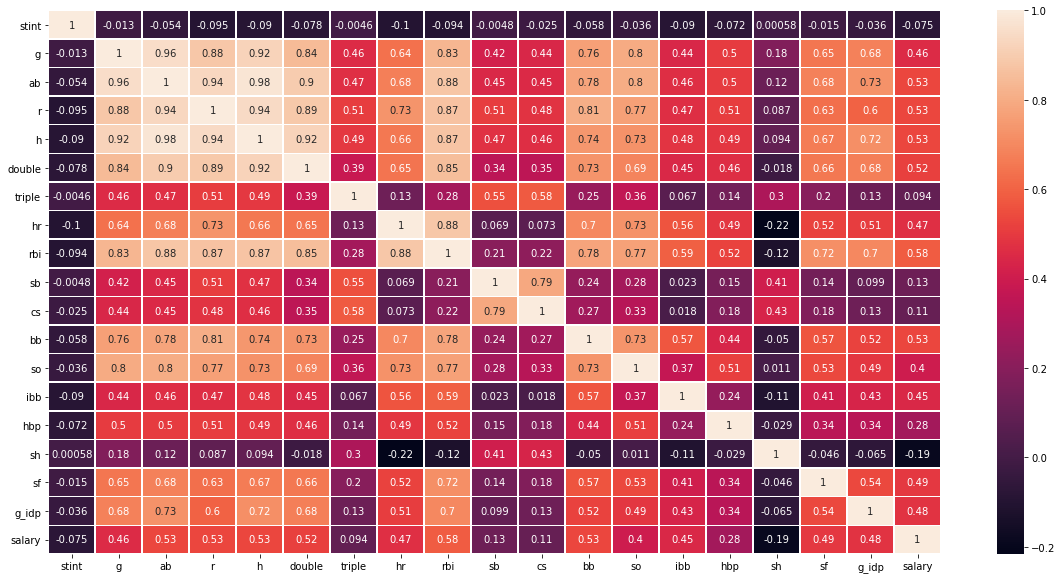

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(adjusted_2014_hitting.corr(),annot=True,linewidth=0.5)

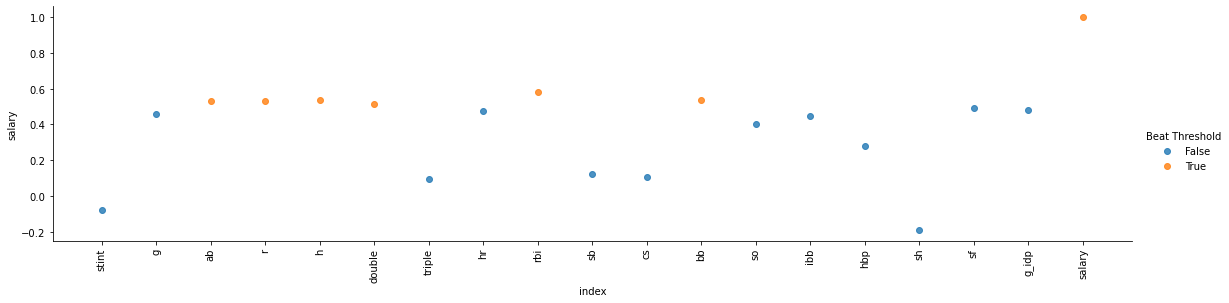

In [22]:
df=pd.DataFrame(adjusted_2014_hitting.corr()['salary']).reset_index()
df['Beat Threshold']=abs(df['salary'])>0.5

sns.lmplot(x='index', y="salary", data=df,hue='Beat Threshold',fit_reg=False,height=4,
           aspect=4).set_xticklabels(rotation=90)

If I set the 'correlation threshold' to be 0.4, then at-bats, runs, hits, doubles, rbi's, base on balls, intentional base on balls, and sacrifice fly's are all directly correlated with salary. Let's use these as the features for our ML model.

In [23]:
features=['ab','r','h','double','rbi','bb','sf']

In [24]:
def scatter(attribute):
    p1=sns.lmplot(x=attribute, y="salary", data=adjusted_2014_hitting,fit_reg=False,height=8,aspect=4)
    ax = p1.axes[0,0]
    for i in range(len(adjusted_2014_hitting)):
        ax.text(adjusted_2014_hitting[attribute][i], adjusted_2014_hitting['salary'][i], adjusted_2014_hitting['name'][i],
               fontsize='small',rotation=45)

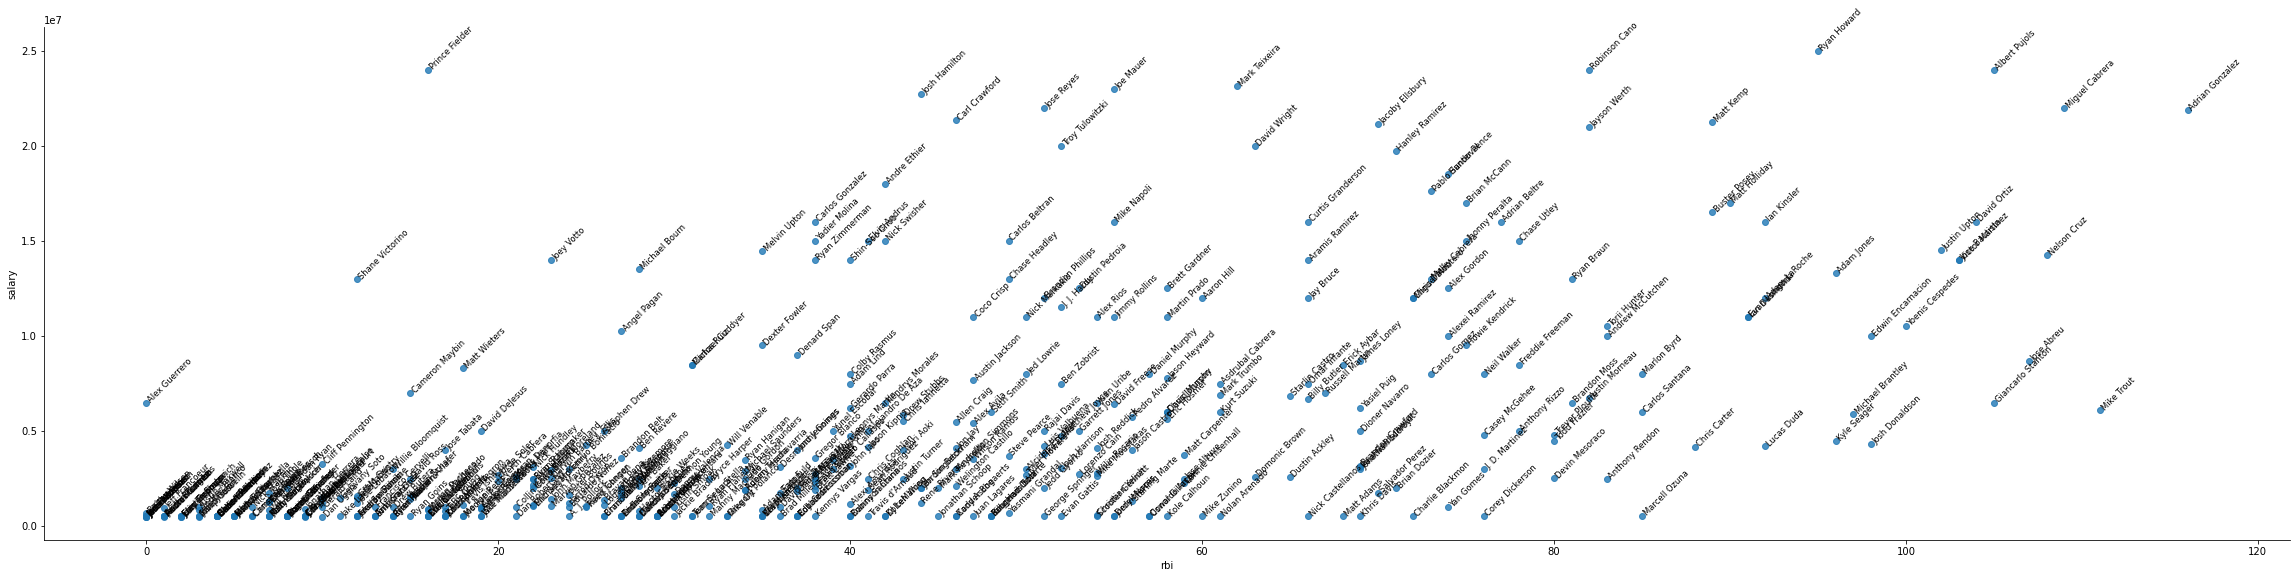

In [25]:
scatter('rbi')

Salary shows positive correlation with rbis.

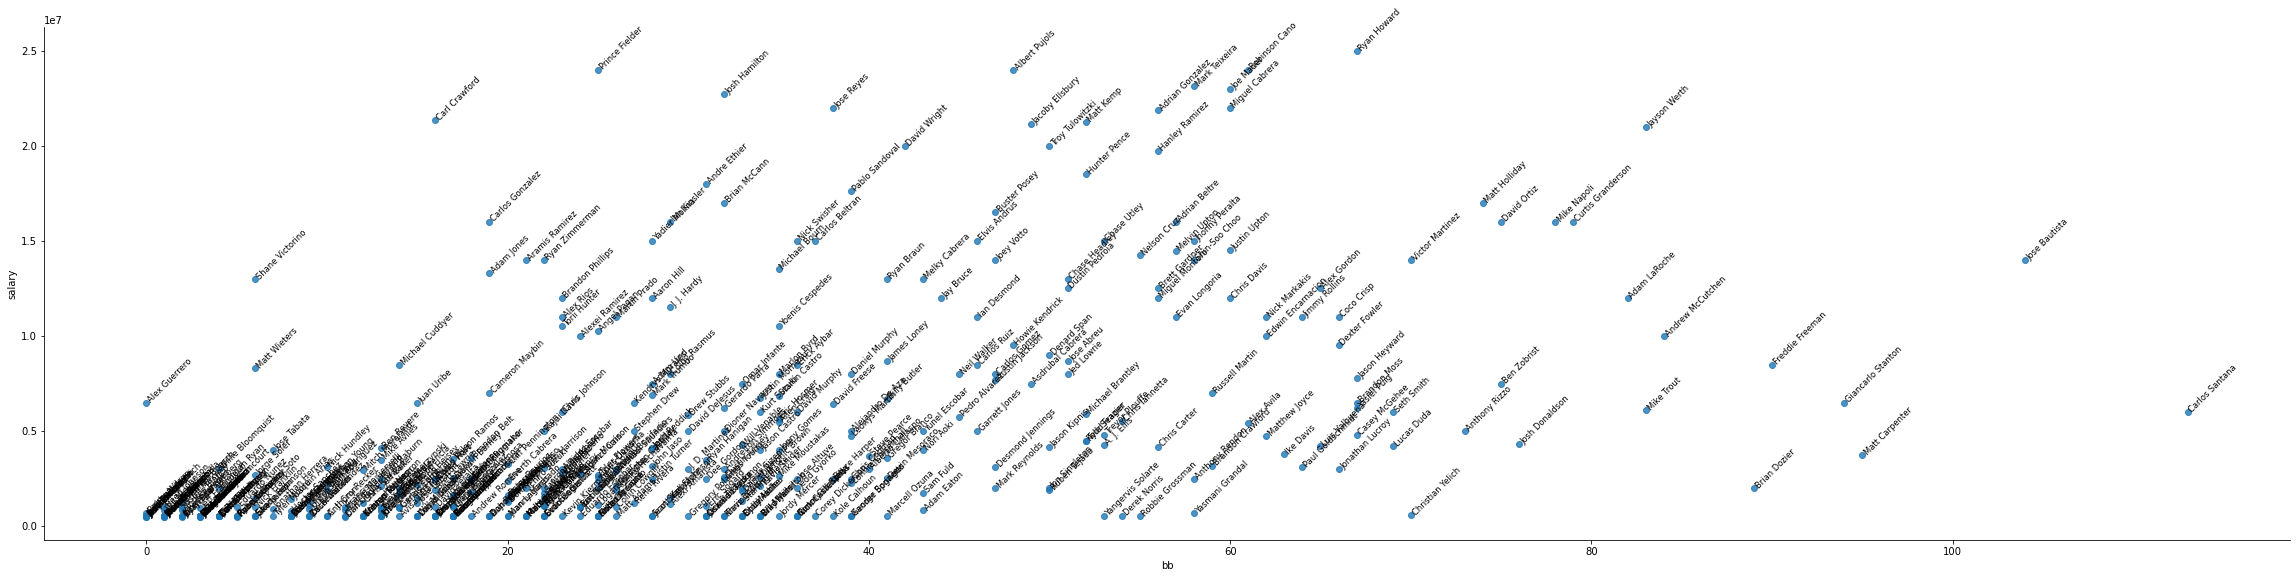

In [26]:
scatter('bb')

Salary shows positive correlation with base on balls.

# Building the ML model

In [27]:
y=adjusted_2014_hitting['salary']
X=adjusted_2014_hitting[features]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1, test_size=0.4)
basic_model = DecisionTreeRegressor(random_state=1)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

# Create dataframe with model data and results

In [28]:
df=pd.DataFrame(val_X)
df['prediction']=predictions
df['ID']=[adjusted_2014_hitting['player_id'][index] for index in df.reset_index()['index']]
df['name']=[adjusted_2014_hitting['name'][index] for index in df.reset_index()['index']]
df['pos']=[adjusted_2014_hitting['pos'][index] for index in df.reset_index()['index']]
df['salary']=[adjusted_2014_hitting['salary'][index] for index in df.reset_index()['index']]
df=df[['name','ID','ab','r','h','double','rbi','bb','pos','salary','prediction']]
df

,name,ID,ab,r,h,double,rbi,bb,pos,salary,prediction
349,Miguel Cabrera,cabremi01,611.0,101.0,191.0,52.0,109.0,60.0,1B,22000000,5875000.0
180,Jake Smolinski,smolija01,86.0,12.0,30.0,5.0,12.0,3.0,OF,508500,508500.0
270,Josh Thole,tholejo01,133.0,11.0,33.0,4.0,7.0,14.0,C,1750000,1225000.0
289,John Jaso,jasojo01,307.0,42.0,81.0,18.0,40.0,28.0,C,3175000,18000000.0
81,Gregory Polanco,polangr01,277.0,50.0,65.0,9.0,33.0,30.0,OF,525000,553900.0
...,...,...,...,...,...,...,...,...,...,...,...
348,Ryan Goins,goinsry01,181.0,14.0,34.0,6.0,15.0,5.0,2B,512800,4000000.0
70,Bryce Harper,harpebr03,352.0,41.0,96.0,10.0,32.0,38.0,OF,2500000,8500000.0
38,Buster Posey,poseybu01,547.0,72.0,170.0,28.0,89.0,47.0,C,16500000,13000000.0
150,Eduardo Nunez,nunezed02,204.0,26.0,51.0,7.0,24.0,5.0,SS,1025000,4000000.0


In [29]:
df['excess']=df['prediction']-df['salary']
df.sort_values(by='excess')

,name,ID,ab,r,h,double,rbi,bb,pos,salary,prediction,excess
146,Josh Hamilton,hamiljo03,338.0,43.0,89.0,21.0,44.0,32.0,OF,22708749,517500.0,-22191249.0
330,Carl Crawford,crawfca02,343.0,56.0,103.0,14.0,46.0,16.0,OF,21357000,1100000.0,-20257000.0
214,Brian McCann,mccanbr01,495.0,57.0,115.0,15.0,75.0,32.0,C,17000000,532500.0,-16467500.0
349,Miguel Cabrera,cabremi01,611.0,101.0,191.0,52.0,109.0,60.0,1B,22000000,5875000.0,-16125000.0
179,Brandon Phillips,phillbr01,462.0,44.0,123.0,25.0,51.0,23.0,2B,12000000,517500.0,-11482500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Ender Inciarte,inciaen01,418.0,54.0,116.0,18.0,27.0,25.0,OF,513000,18000000.0,17487000.0
39,Kole Calhoun,calhoko01,493.0,90.0,134.0,31.0,58.0,38.0,OF,537500,22000000.0,21462500.0
398,Francisco Cervelli,cervefr01,146.0,18.0,44.0,11.0,13.0,11.0,C,987500,24000000.0,23012500.0
333,Matt den Dekker,dendema01,152.0,23.0,38.0,11.0,7.0,21.0,OF,512972,24000000.0,23487028.0


add commas, mae, show graphs for before

In [30]:
df.style.format({'prediction': "{0:,.2f}",'salary': "{0:,.2f}",'excess': "{0:,.2f}"})
df=df.astype({"ab": int,"r": int,"h": int,"double": int,"rbi": int,"bb":int}) 
df

,name,ID,ab,r,h,double,rbi,bb,pos,salary,prediction,excess
349,Miguel Cabrera,cabremi01,611,101,191,52,109,60,1B,22000000,5875000.0,-16125000.0
180,Jake Smolinski,smolija01,86,12,30,5,12,3,OF,508500,508500.0,0.0
270,Josh Thole,tholejo01,133,11,33,4,7,14,C,1750000,1225000.0,-525000.0
289,John Jaso,jasojo01,307,42,81,18,40,28,C,3175000,18000000.0,14825000.0
81,Gregory Polanco,polangr01,277,50,65,9,33,30,OF,525000,553900.0,28900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
348,Ryan Goins,goinsry01,181,14,34,6,15,5,2B,512800,4000000.0,3487200.0
70,Bryce Harper,harpebr03,352,41,96,10,32,38,OF,2500000,8500000.0,6000000.0
38,Buster Posey,poseybu01,547,72,170,28,89,47,C,16500000,13000000.0,-3500000.0
150,Eduardo Nunez,nunezed02,204,26,51,7,24,5,SS,1025000,4000000.0,2975000.0


In [31]:
type(df.style.format({'prediction': "{0:,.2f}",'salary': "{0:,.2f}",'excess': "{0:,.2f}"})
)

pandas.io.formats.style.Styler

# Evaluate model

In [32]:
abs(df['excess']).mean()

4394978.006097561

In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['salary'], df['prediction'])

4394978.006097561

Average error of about $3.5 million.

In [34]:
df['salary'].mean()

3993612.1097560977

In [35]:
df['salary'].median()

1750000.0

Average salary is about $4.5 million and median is $2 million...

In [36]:
adjusted_2014_hitting.to_csv('ML1')